In [3]:
#PRIOR TO DELIVERY, RUN THIS CELL AND THEN DELETE IT (esc, D, D)
%matplotlib inline

In [11]:
import quandl
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"
data = quandl.get("BCB/UDJIAD1")

In [21]:
data

,Value
Date,
1896-07-14,33.43
1896-07-15,32.28
1896-07-16,31.95
1896-07-17,31.94
1896-07-18,31.50
1896-07-20,30.50
1896-07-21,30.68
1896-07-22,31.99
1896-07-23,32.29


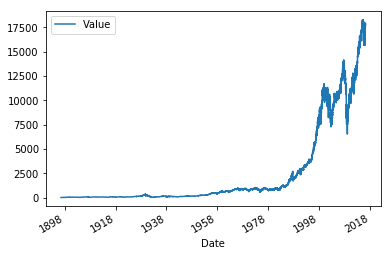

In [6]:
data.plot()

(6000, 15000)

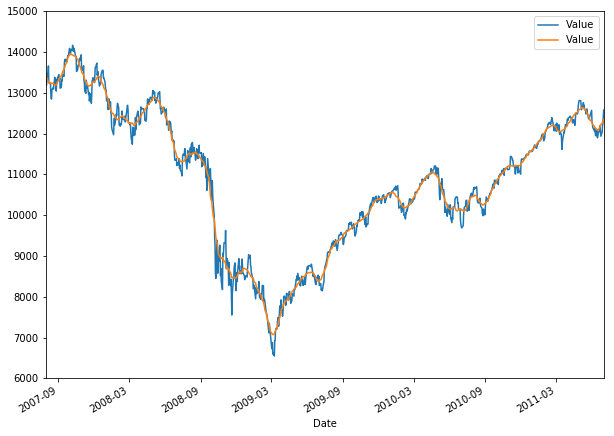

In [32]:
import matplotlib.pyplot as plt
import datetime


ax = data.plot(figsize=(10,7.5))
data.rolling(21,center=True).mean().plot(ax=ax)


# TODO: try to clean up the datetime declaration
plt.xlim([datetime.date(2007, 8, 1), datetime.date(2011, 7, 1)])
plt.ylim(6000,15000)

(6000, 15000)

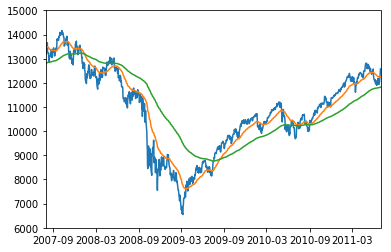

In [37]:
plt.plot(data, label='Dow Jones Industrial Average')
plt.plot(data.ewm(span=50).mean(), label='50 Day Moving Average')
plt.plot(data.ewm(span=200).mean(), label='200 Day Moving Average')

plt.xlim([datetime.date(2007, 8, 1), datetime.date(2011, 7, 1)])
plt.ylim(6000,15000)

In [15]:
# Get the data in the format that fbprophet wants it
data_forecast = data.reset_index()
data_forecast = data_forecast.rename(columns={"Date": "ds", "Value": "y"})

In [16]:
from fbprophet import Prophet
m = Prophet()
m.fit(data_forecast)
future = m.make_future_dataframe(periods=int(5*365))
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1896-07-14,42.116498,-957.969111,1010.509491,42.116498,42.116498,13.235836,13.235836,13.235836,-0.562592,-0.562592,-0.562592,13.798428,13.798428,13.798428,0.0,0.0,0.0,55.352333
1,1896-07-15,42.131607,-934.668143,1006.762284,42.131607,42.131607,13.521534,13.521534,13.521534,-0.352006,-0.352006,-0.352006,13.873540,13.873540,13.873540,0.0,0.0,0.0,55.653141
2,1896-07-16,42.146716,-861.432121,1013.849602,42.146716,42.146716,15.078909,15.078909,15.078909,1.218910,1.218910,1.218910,13.860000,13.860000,13.860000,0.0,0.0,0.0,57.225625
3,1896-07-17,42.161825,-900.391381,1060.711276,42.161825,42.161825,14.855363,14.855363,14.855363,1.097995,1.097995,1.097995,13.757368,13.757368,13.757368,0.0,0.0,0.0,57.017188
4,1896-07-18,42.176934,-887.586623,1008.033482,42.176934,42.176934,13.990252,13.990252,13.990252,0.423569,0.423569,0.423569,13.566682,13.566682,13.566682,0.0,0.0,0.0,56.167185
5,1896-07-20,42.207151,-778.755828,1054.449880,42.207151,42.207151,15.438910,15.438910,15.438910,2.507261,2.507261,2.507261,12.931649,12.931649,12.931649,0.0,0.0,0.0,57.646061
6,1896-07-21,42.222260,-851.928610,1059.083549,42.222260,42.222260,11.932546,11.932546,11.932546,-0.562592,-0.562592,-0.562592,12.495138,12.495138,12.495138,0.0,0.0,0.0,54.154806
7,1896-07-22,42.237369,-910.988935,988.186626,42.237369,42.237369,11.633820,11.633820,11.633820,-0.352006,-0.352006,-0.352006,11.985826,11.985826,11.985826,0.0,0.0,0.0,53.871190
8,1896-07-23,42.252478,-863.452119,1037.571362,42.252478,42.252478,12.628177,12.628177,12.628177,1.218910,1.218910,1.218910,11.409267,11.409267,11.409267,0.0,0.0,0.0,54.880655
9,1896-07-24,42.267587,-860.603014,1011.254070,42.267587,42.267587,11.869286,11.869286,11.869286,1.097995,1.097995,1.097995,10.771291,10.771291,10.771291,0.0,0.0,0.0,54.136873


(732889.0, 737972.0)

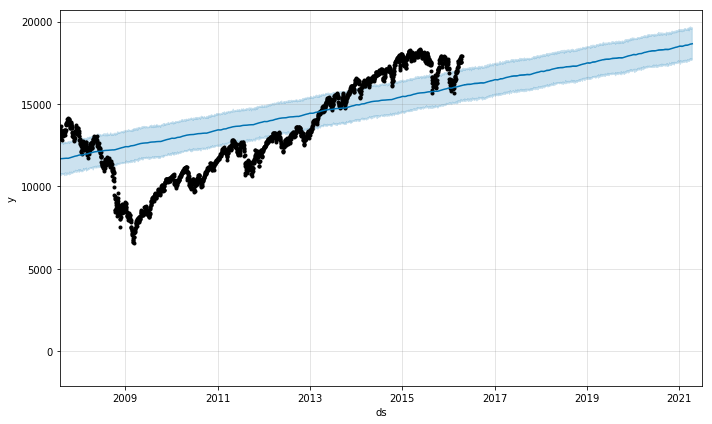

In [35]:
m.plot(forecast)
plt.xlim([datetime.date(2007, 8, 1), datetime.date(2021, 7, 1)])